In [1]:
import csv
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def csv_to_dict(file_path):
    data = {}
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader)
        i = 1
        for row in reader:
            key = i
            i += 1
            values = row[1:]
            data[key] = values
    return data
data = csv_to_dict("responses.csv")
# print(data)

27 18 24


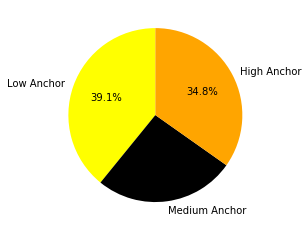

<Figure size 432x288 with 0 Axes>

In [3]:
# print(data)
low = 0
medium = 0
high = 0
for key in data:
    if data[key][10] == 'Option 1':
        low += 1
    elif data[key][10] == 'Option 3':
        medium += 1
    else:
        high += 1
print(low, medium, high)
labels = ['Low Anchor', 'Medium Anchor', 'High Anchor']
values = [low, medium, high]
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['yellow', 'black', 'orange'])
plt.show()
plt.savefig('percentages_anchor.png')

In [4]:
scores = {}
one_right = 0
two_right = 0
three_right = 0
four_right = 0
five_right = 0
six_right = 0
seven_right = 0
eight_right = 0
nine_right = 0
ten_right = 0
right = 0
for key, values in data.items():
    score = 0
    if "0.05" in values[0] or "5 cents" in values[0] or values[0] == ".05":
        score += 1
        one_right += 1
    if "5" in values[1]:
        score += 1
        two_right += 1
    if "47" in values[2] and values[2] != "47 minutes":
        score += 1
        three_right += 1
    if "9" in values[3] and values[3] != "Assuming you mean 9 die out of 17 then 17 - 9 = 8":
        score += 1
        four_right += 1
    if "2" in values[4] or "two" in values[4].lower():
        score += 1
        five_right += 1
    if values[5] == "1" or values[5] == "1 Hour" or values[5] == "1 hour" or values[5] == "1 hr" or values[5] == "1hour" or values[5] == "1hr" or values[5] == "one hour":
        score += 1
        six_right += 1
    if values[6] == "78":
        score += 1
        seven_right += 1
    if "4" in values[7] and values[7] != "4.5":
        score += 1
        eight_right += 1
    if ("yes" in values[8].lower() or "true" in values[8].lower()) and values[8] != "Not True":
        score += 1
        nine_right += 1
    if values[9] == "vkna":
        score += 1
        ten_right += 1
    scores[key] = score
scores_each_question = [one_right, two_right, three_right, four_right, five_right, six_right, seven_right, eight_right, nine_right, ten_right]
print(scores)
# print(scores_each_question)

{1: 9, 2: 9, 3: 10, 4: 7, 5: 9, 6: 9, 7: 8, 8: 6, 9: 9, 10: 7, 11: 9, 12: 10, 13: 10, 14: 9, 15: 10, 16: 8, 17: 6, 18: 8, 19: 9, 20: 8, 21: 6, 22: 9, 23: 9, 24: 9, 25: 9, 26: 7, 27: 7, 28: 9, 29: 10, 30: 10, 31: 8, 32: 10, 33: 10, 34: 9, 35: 8, 36: 7, 37: 5, 38: 10, 39: 9, 40: 10, 41: 10, 42: 8, 43: 10, 44: 9, 45: 8, 46: 10, 47: 9, 48: 10, 49: 9, 50: 9, 51: 10, 52: 7, 53: 10, 54: 9, 55: 8, 56: 7, 57: 9, 58: 10, 59: 10, 60: 10, 61: 10, 62: 9, 63: 7, 64: 9, 65: 8, 66: 9, 67: 9, 68: 6, 69: 9}


In [5]:
freq_map = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for key, value in scores.items():
    freq_map[value - 1] += 1
print(freq_map)

[0, 0, 0, 0, 1, 4, 8, 10, 26, 20]


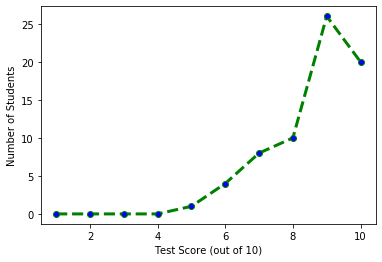

In [6]:
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], freq_map, color='green', linestyle='dashed', linewidth = 3, marker='.', markerfacecolor='blue', markersize=12)
plt.xlabel('Test Score (out of 10)')
plt.ylabel('Number of Students')
plt.savefig('test_score.png')

In [7]:
low_anchor_values = {}
medium_anchor_values = {}
high_anchor_values = {}
l1 = []
l2 = []
l3 = []
l4 = []
l5 = []
l6 = []
m1 = []
m2 = []
m3 = []
m4 = []
m5 = []
m6 = []
h1 = []
h2 = []
h3 = []
h4 = []
h5 = []
h6 = []
for key, value in data.items():
    curr = []
    curr.append(scores[key] >= 8.5)
    if value[10] == "Option 1":
        for i in range(11, 17):
            curr.append(int(''.join(filter(str.isdigit, value[i]))))
        l1.append(int(''.join(filter(str.isdigit, value[11]))))
        l2.append(int(''.join(filter(str.isdigit, value[12]))))
        l3.append(int(''.join(filter(str.isdigit, value[13]))))
        l4.append(int(''.join(filter(str.isdigit, value[14]))))
        l5.append(int(''.join(filter(str.isdigit, value[15]))))
        l6.append(int(''.join(filter(str.isdigit, value[16]))))
        low_anchor_values[key] = curr
    # # medium anchor
    if value[10] == "Option 3":
        for i in range(17, 23):
            curr.append(int(''.join(filter(str.isdigit, value[i]))))
        m1.append(int(''.join(filter(str.isdigit, value[17]))))
        m2.append(int(''.join(filter(str.isdigit, value[18]))))
        m3.append(int(''.join(filter(str.isdigit, value[19]))))
        m4.append(int(''.join(filter(str.isdigit, value[20]))))
        m5.append(int(''.join(filter(str.isdigit, value[21]))))
        m6.append(int(''.join(filter(str.isdigit, value[22]))))
        medium_anchor_values[key] = curr
    # high anchor
    if value[10] == "Option 2":
        for i in range(23, 29):
            curr.append(int(''.join(filter(str.isdigit, value[i]))))
        h1.append(int(''.join(filter(str.isdigit, value[23]))))
        h2.append(int(''.join(filter(str.isdigit, value[24]))))
        h3.append(int(''.join(filter(str.isdigit, value[25]))))
        h4.append(int(''.join(filter(str.isdigit, value[26]))))
        h5.append(int(''.join(filter(str.isdigit, value[27]))))
        h6.append(int(''.join(filter(str.isdigit, value[28]))))
        high_anchor_values[key] = curr

In [8]:
print(len(l1))
print(len(m1))
print(len(h1))

27
18
24


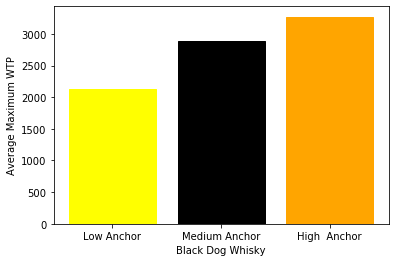

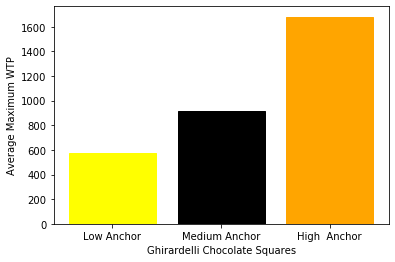

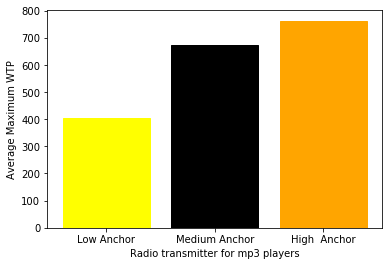

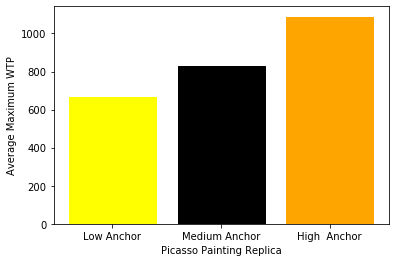

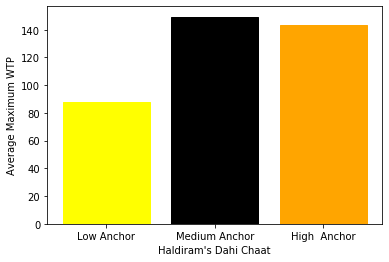

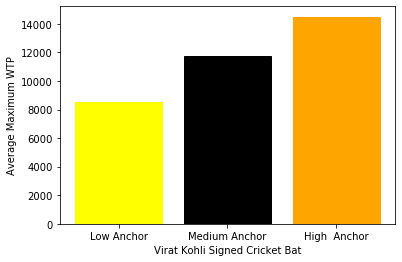

In [9]:
bar1 = plt.bar(['Low Anchor', 'Medium Anchor', 'High  Anchor'], [np.mean(l1), np.mean(m1), np.mean(h1)])
bar1[0].set_color('yellow')
bar1[1].set_color('black')
bar1[2].set_color('orange')
plt.ylabel('Average Maximum WTP')
plt.xlabel('Black Dog Whisky')
plt.savefig('black_dog_whisky.png')
plt.show()
bar2 = plt.bar(['Low Anchor', 'Medium Anchor', 'High  Anchor'], [np.mean(l2), np.mean(m2), np.mean(h2)])
bar2[0].set_color('yellow')
bar2[1].set_color('black')
bar2[2].set_color('orange')
plt.ylabel('Average Maximum WTP')
plt.xlabel('Ghirardelli Chocolate Squares')
plt.savefig('ghirardelli_chocolate_squares.png')
plt.show()
bar3 = plt.bar(['Low Anchor', 'Medium Anchor', 'High  Anchor'], [np.mean(l3), np.mean(m3), np.mean(h3)])
bar3[0].set_color('yellow')
bar3[1].set_color('black')
bar3[2].set_color('orange')
plt.ylabel('Average Maximum WTP')
plt.xlabel('Radio transmitter for mp3 players')
plt.savefig('radio_transmitter_for_mp3_players.png')
plt.show()
bar4 = plt.bar(['Low Anchor', 'Medium Anchor', 'High  Anchor'], [np.mean(l4), np.mean(m4), np.mean(h4)])
bar4[0].set_color('yellow')
bar4[1].set_color('black')
bar4[2].set_color('orange')
plt.ylabel('Average Maximum WTP')
plt.xlabel('Picasso Painting Replica')
plt.savefig('picasso_painting_replica.png')
plt.show()
bar5 = plt.bar(['Low Anchor', 'Medium Anchor', 'High  Anchor'], [np.mean(l5), np.mean(m5), np.mean(h5)])
bar5[0].set_color('yellow')
bar5[1].set_color('black')
bar5[2].set_color('orange')
plt.ylabel('Average Maximum WTP')
plt.xlabel('Haldiram\'s Dahi Chaat')
plt.savefig('haldirams_dahi_chaat.png')
plt.show()
bar6 = plt.bar(['Low Anchor', 'Medium Anchor', 'High  Anchor'], [np.mean(l6), np.mean(m6), np.mean(h6)])
bar6[0].set_color('yellow')
bar6[1].set_color('black')
bar6[2].set_color('orange')
plt.ylabel('Average Maximum WTP')
plt.xlabel('Virat Kohli Signed Cricket Bat')
plt.savefig('virat_kohli_signed_cricket_bat.png')
plt.show()